<a href="https://colab.research.google.com/github/malithjkd/AI_ML/blob/main/sktime_hapitc_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Haptic object classifcation useing Time series classifcation - Sktime 



In [2]:
pip install sktime

     |████████████████████████████████| 6.2 MB 4.1 MB/s 
     |████████████████████████████████| 3.3 MB 44.3 MB/s 
     |████████████████████████████████| 9.8 MB 34.7 MB/s 
     |████████████████████████████████| 14.9 MB 29.8 MB/s 
     |████████████████████████████████| 34.5 MB 12 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 wh

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator
import sktime
from sktime.utils.data_io import load_from_tsfile_to_dataframe

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sktime.classification.compose import ComposableTimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sktime.utils.slope_and_trend import _slope

from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Haptic_Dataset/

/content/drive/MyDrive/Haptic_Dataset


In [5]:
X, y = load_from_tsfile_to_dataframe("haptic_data_1.ts", replace_missing_vals_with='NaN')
X_f, y_f = load_from_tsfile_to_dataframe("haptic_data_2.ts", replace_missing_vals_with='NaN')


/usr/local/lib/python3.7/dist-packages/sktime/utils/data_io.py:66: FutureWarning: This function has moved to datasets/_data_io, this version will be removed in V0.10
  FutureWarning,


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=.2, random_state=42)

In [18]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train_f.shape, y_train_f.shape, X_test_f.shape, y_test_f.shape)


(62, 4) (62,) (16, 4) (16,)
(62, 9) (62,) (16, 9) (16,)


In [8]:
X_train.head()

,dim_0,dim_1,dim_2,dim_3
45,0 0.009806 1 0.027408 2 0...,0 0.027850 1 0.080656 2 0.13...,0 0.013351 1 0.058630 2 0.11...,0 0.00000 1 0.00000 2 0.0000...
60,0 0.010872 1 0.028838 2 0...,0 0.031427 1 0.085330 2 0.13...,0 1.610166e-02 1 6.314812e-02 2 ...,0 0.000 1 0.000 2 0.000 3 ...
18,0 0.009048 1 0.026671 2 0...,0 0.018621 1 0.055630 2 0.09...,0 0.008787 1 0.040241 2 0.07...,0 0.000 1 0.000 2 0.000 3 ...
54,0 0.008905 1 0.026495 2 0...,0 0.020960 1 0.063175 2 0.10...,0 0.009857 1 0.045607 2 0.08...,0 0.000000 1 0.000000 2 0.00...
6,0 0.012426 1 0.031011 2 0...,0 0.028480 1 0.073088 2 0.11...,0 1.551106e-02 1 5.522111e-02 2 ...,0 0.000000 1 0.000000 2 0.00...


In [9]:
X_train_f.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8
69,0 0.011598 1 0.031504 2 0...,0 0.026965 1 0.074744 2 0.11...,0 0.014541 1 0.056842 2 0.09...,0 0.000000 1 0.000000 2 0.00...,0 0.000000 1 -0.000693 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
17,0 0.010774 1 0.028757 2 0...,0 0.021699 1 0.059467 2 0.09...,0 0.011046 1 0.043949 2 0.08...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000581 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0.00...
53,0 0.011724 1 0.031755 2 0...,0 0.027250 1 0.075330 2 0.11...,0 0.014746 1 0.057423 2 0.09...,0 -0.000003 1 0.000000 2 0.00...,0 0.000000 1 -0.000705 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000e+00 1 1.202816e-07 2 ...
39,0 0.011746 1 0.032028 2 0...,0 0.030757 1 0.085528 2 0.13...,0 0.016724 1 0.065356 2 0.11...,0 0.00 1 0.00 2 0.00 3 ...,0 0.000000 1 -0.000715 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0.00...
14,0 0.011532 1 0.031601 2 0...,0 0.033548 1 0.093763 2 0.14...,0 0.018053 1 0.071378 2 0.12...,0 0.0000 1 0.0000 2 0.0000 3...,0 0.000000 1 -0.000694 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...


In [19]:
print(np.unique(y_test))
print(np.unique(y_test_f))

['banana' 'onion' 'orange' 'sponge' 'tomato']
['banana' 'onion' 'orange' 'sponge' 'tomato']


# Time Series forest Classfication - no features

In [20]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8125

In [21]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      banana       1.00      0.67      0.80         3
       onion       0.75      1.00      0.86         3
      orange       1.00      1.00      1.00         4
      sponge       1.00      0.33      0.50         3
      tomato       0.60      1.00      0.75         3

    accuracy                           0.81        16
   macro avg       0.87      0.80      0.78        16
weighted avg       0.88      0.81      0.80        16



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


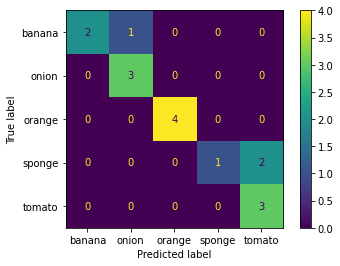

In [22]:
plot_confusion_matrix(clf, X_test, y_test)

# BOSSEnsemble & ColumnEnsembleClassifier

In [27]:
clf = ColumnEnsembleClassifier(estimators=[("TSF0", TimeSeriesForestClassifier(n_estimators=100), [0]),("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=5), [3]),])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9375

In [28]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00         3
       onion       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         4
      sponge       1.00      0.67      0.80         3
      tomato       0.75      1.00      0.86         3

    accuracy                           0.94        16
   macro avg       0.95      0.93      0.93        16
weighted avg       0.95      0.94      0.94        16



# Time Series forest Classfication - with features

In [24]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f, y_train_f)
clf.score(X_test_f, y_test_f)

1.0

In [25]:
print(classification_report(y_test_f, clf.predict(X_test_f)))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00         3
       onion       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         4
      sponge       1.00      1.00      1.00         3
      tomato       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


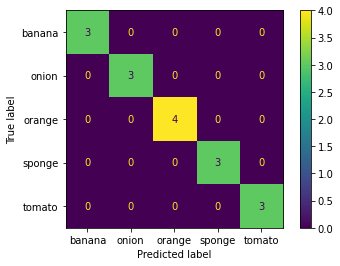

In [26]:
plot_confusion_matrix(clf, X_test_f, y_test_f)

# BOSSEnsemble & ColumnEnsembleClassifier - With features

In [30]:
clf = ColumnEnsembleClassifier(estimators=[("TSF0", TimeSeriesForestClassifier(n_estimators=100), [0]),("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=5), [3]),])
clf.fit(X_train_f, y_train_f)
clf.score(X_test_f, y_test_f)

0.9375

In [31]:
print(classification_report(y_test_f, clf.predict(X_test_f)))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00         3
       onion       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         4
      sponge       1.00      0.67      0.80         3
      tomato       0.75      1.00      0.86         3

    accuracy                           0.94        16
   macro avg       0.95      0.93      0.93        16
weighted avg       0.95      0.94      0.94        16

